In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data/Selenium/Data.csv')

In [3]:
df.head()

,Player,Tackles,Inter,Clear,Blocks,SpG,KeyP,Drb,Fouled,PS%,...,LongB,ThrB,CF,WF,AM,WM,CM,DM,FB,CB
0,Kevin De Bruyne Man City,0.9,0.2,0.4,0.1,2.2,3.2,1.0,0.8,79.5,...,2.5,0.4,1,0,0,1,1,0,0,0
1,Kieran Trippier Newcastle,2.0,1.3,1.9,0.4,0.4,2.9,0.5,0.9,74.7,...,3.4,0.2,0,0,0,1,0,0,1,0
2,Gabriel Jesus Arsenal,1.2,0.5,0.5,0.1,3.3,1.4,2.0,2.4,82.3,...,0.5,0.1,1,1,0,0,0,0,0,0
3,Erling Haaland Man City,0.1,0.1,0.4,0.1,3.5,0.8,0.2,0.7,75.6,...,0.0,0.1,1,0,0,0,0,0,0,0
4,Harry Kane Tottenham,0.3,0.1,0.4,0.2,3.6,1.5,1.2,1.4,72.2,...,1.9,0.2,1,0,1,0,0,0,0,0


In [4]:
X = df.iloc[:, 1:13]

In [5]:
y = df.iloc[:, 13:]

In [6]:
X.head()

,Tackles,Inter,Clear,Blocks,SpG,KeyP,Drb,Fouled,PS%,Crosses,LongB,ThrB
0,0.9,0.2,0.4,0.1,2.2,3.2,1.0,0.8,79.5,2.2,2.5,0.4
1,2.0,1.3,1.9,0.4,0.4,2.9,0.5,0.9,74.7,3.8,3.4,0.2
2,1.2,0.5,0.5,0.1,3.3,1.4,2.0,2.4,82.3,0.1,0.5,0.1
3,0.1,0.1,0.4,0.1,3.5,0.8,0.2,0.7,75.6,0.0,0.0,0.1
4,0.3,0.1,0.4,0.2,3.6,1.5,1.2,1.4,72.2,0.2,1.9,0.2


In [7]:
y.head()

,CF,WF,AM,WM,CM,DM,FB,CB
0,1,0,0,1,1,0,0,0
1,0,0,0,1,0,0,1,0
2,1,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0


In [8]:
for i in range(y.shape[1]):
    print("Label {}: {} samples".format(i, sum(y.iloc[:, i])))

Label 0: 415 samples
Label 1: 292 samples
Label 2: 219 samples
Label 3: 436 samples
Label 4: 326 samples
Label 5: 179 samples
Label 6: 387 samples
Label 7: 370 samples


# Normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
X = scaler.fit_transform(X)

# Classification

In [12]:
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC
from tensorflow_addons.metrics import HammingLoss

C:\Users\MS\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## Case:['CB', 'CF', 'WF', 'AM', 'CM', 'FB', 'WM', 'DM']

In [14]:
y_reordered = y[['CB', 'CF', 'WF', 'AM', 'CM', 'FB', 'WM', 'DM']].to_numpy()

In [15]:
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y_reordered, test_size=0.3)

### CB

In [16]:
model0 = Sequential()

In [17]:
model0.add(Dense(32, input_dim=12, activation='relu'))
model0.add(Dense(16, activation='relu'))
model0.add(Dense(1, activation='sigmoid'))

In [18]:
model0.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=[AUC(curve='ROC'), AUC(curve='PR')])

In [19]:
history0 = model0.fit(X_train, y_train[:, 0], epochs=100, batch_size=32, verbose=0)

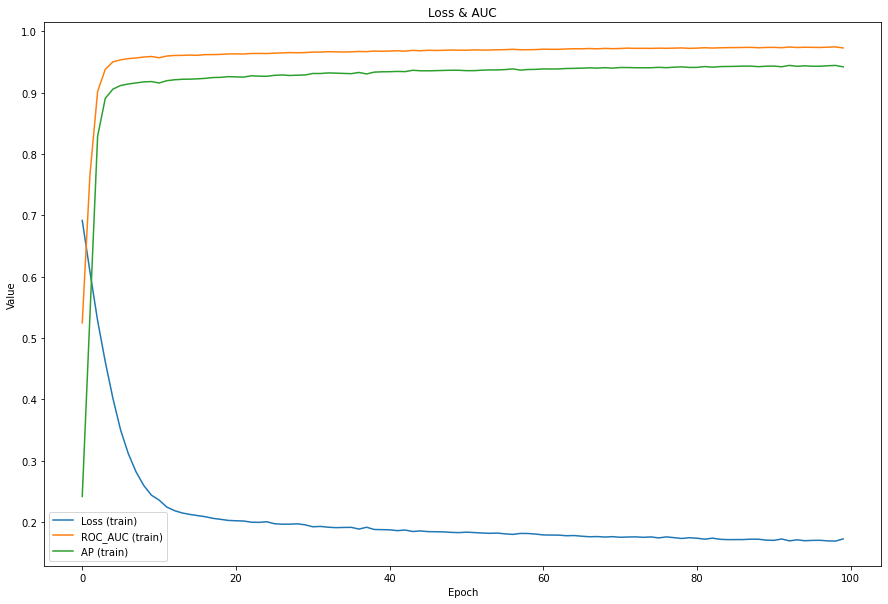

In [20]:
plt.figure(figsize=(15, 10))
plt.plot(history0.history['loss'])
plt.plot(history0.history['auc'])
plt.plot(history0.history['auc_1'])
plt.title('Loss & AUC')
plt.legend(['Loss (train)','ROC_AUC (train)','AP (train)'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

In [21]:
merged_X_train = np.hstack((X_train, model0.predict(X_train)))
merged_X_test = np.hstack((X_test, model0.predict(X_test)))

14/14 [==============================] - 0s 3ms/step


### CF

In [22]:
model1 = Sequential()

In [23]:
model1.add(Dense(32, input_dim=13, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [24]:
model1.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=[AUC(curve='ROC'), AUC(curve='PR')])

In [25]:
history1 = model1.fit(merged_X_train, y_train[:, 1], epochs=100, batch_size=32, verbose=0)

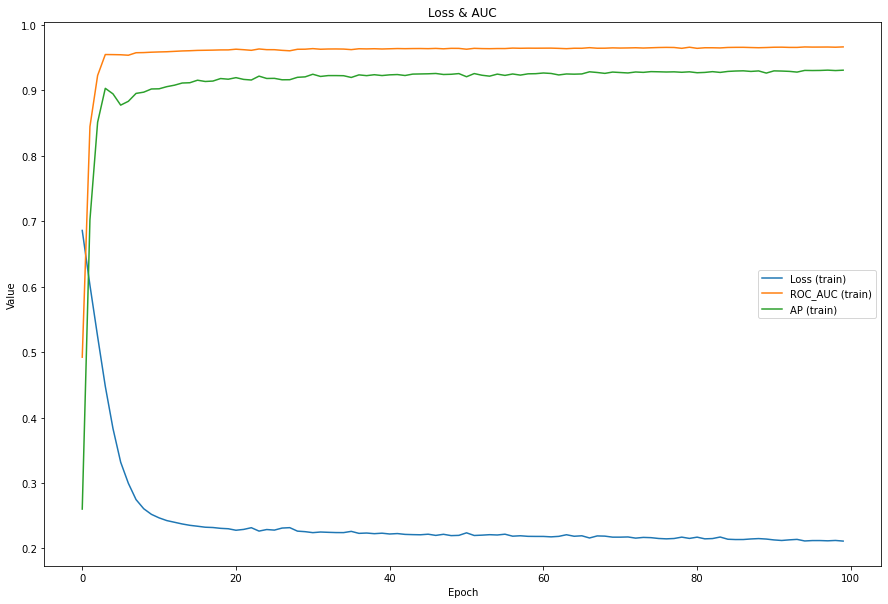

In [26]:
plt.figure(figsize=(15, 10))
plt.plot(history1.history['loss'])
plt.plot(history1.history['auc_2'])
plt.plot(history1.history['auc_3'])
plt.title('Loss & AUC')
plt.legend(['Loss (train)','ROC_AUC (train)','AP (train)'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

In [27]:
merged_X_train = np.hstack((merged_X_train, model1.predict(merged_X_train)))
merged_X_test = np.hstack((merged_X_test, model1.predict(merged_X_test)))

14/14 [==============================] - 0s 5ms/step


### WF

In [28]:
model2 = Sequential()

In [29]:
model2.add(Dense(32, input_dim=14, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [30]:
model2.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=[AUC(curve='ROC'), AUC(curve='PR')])

In [31]:
history2 = model2.fit(merged_X_train, y_train[:, 2], epochs=100, batch_size=32, verbose=0)

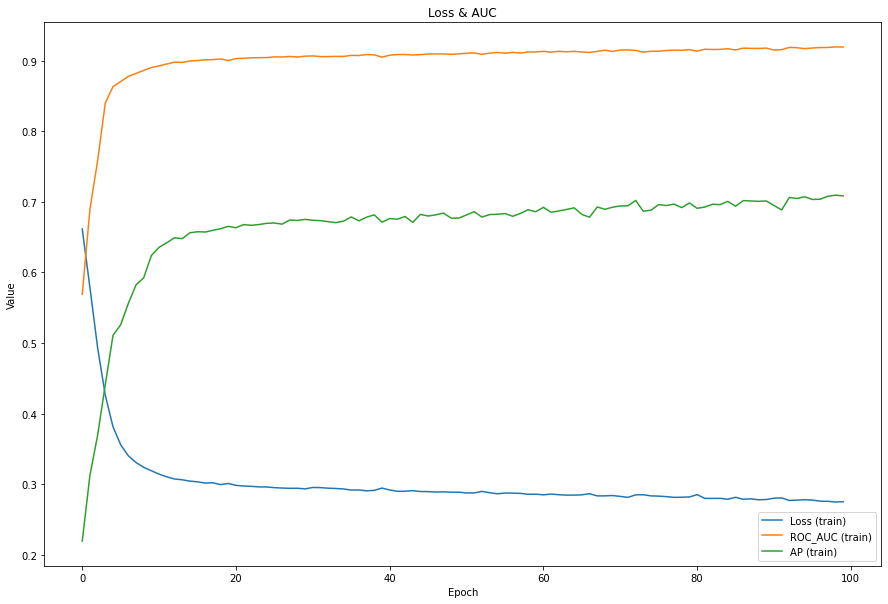

In [32]:
plt.figure(figsize=(15, 10))
plt.plot(history2.history['loss'])
plt.plot(history2.history['auc_4'])
plt.plot(history2.history['auc_5'])
plt.title('Loss & AUC')
plt.legend(['Loss (train)','ROC_AUC (train)','AP (train)'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

In [33]:
merged_X_train = np.hstack((merged_X_train, model2.predict(merged_X_train)))
merged_X_test = np.hstack((merged_X_test, model2.predict(merged_X_test)))

14/14 [==============================] - 0s 1ms/step


### AM

In [34]:
model3 = Sequential()

In [35]:
model3.add(Dense(32, input_dim=15, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [36]:
model3.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=[AUC(curve='ROC'), AUC(curve='PR')])

In [37]:
history3 = model3.fit(merged_X_train, y_train[:, 3], epochs=100, batch_size=32, verbose=0)

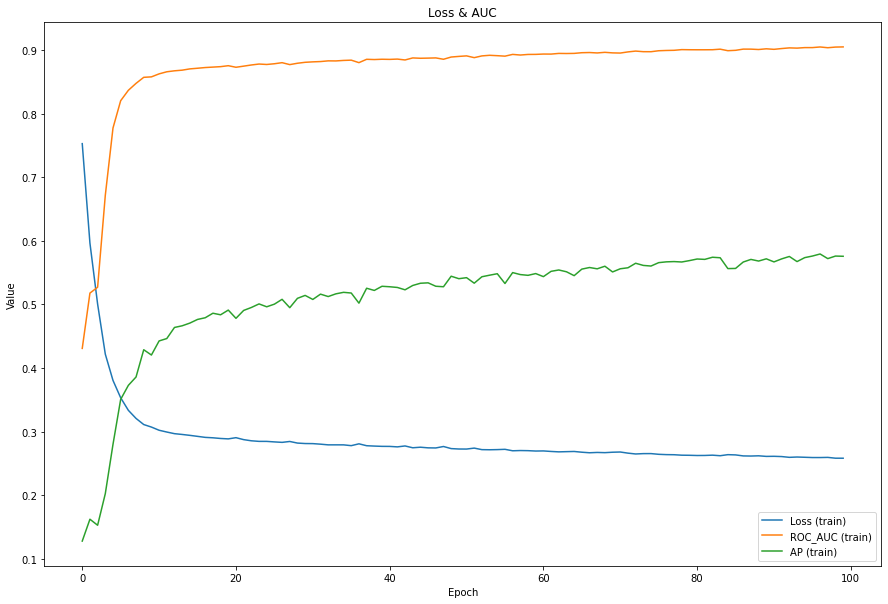

In [38]:
plt.figure(figsize=(15, 10))
plt.plot(history3.history['loss'])
plt.plot(history3.history['auc_6'])
plt.plot(history3.history['auc_7'])
plt.title('Loss & AUC')
plt.legend(['Loss (train)','ROC_AUC (train)','AP (train)'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

In [39]:
merged_X_train = np.hstack((merged_X_train, model3.predict(merged_X_train)))
merged_X_test = np.hstack((merged_X_test, model3.predict(merged_X_test)))

14/14 [==============================] - 0s 1ms/step


### CM

In [40]:
model4 = Sequential()

In [41]:
model4.add(Dense(32, input_dim=16, activation='relu'))
model4.add(Dense(16, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

In [42]:
model4.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=[AUC(curve='ROC'), AUC(curve='PR')])

In [43]:
history4 = model4.fit(merged_X_train, y_train[:, 4], epochs=100, batch_size=32, verbose=0)

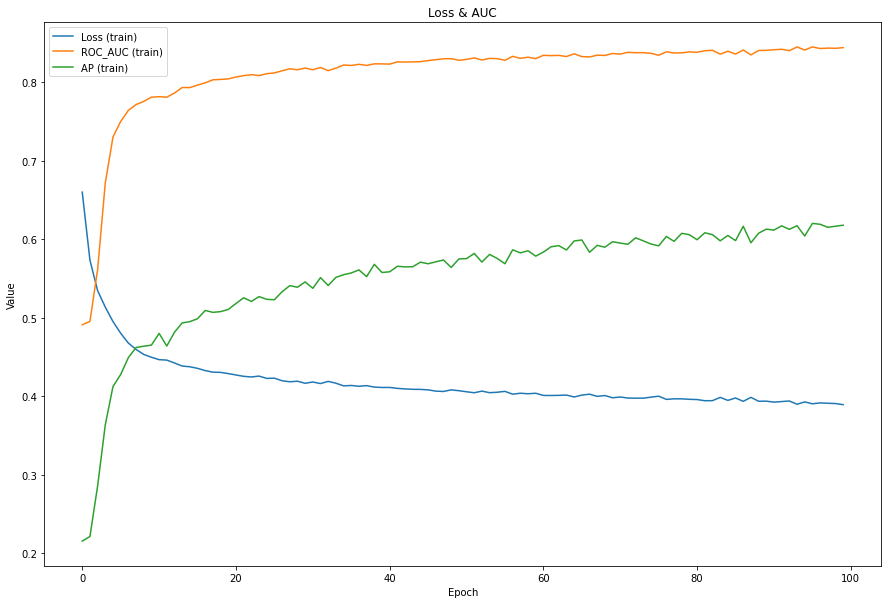

In [44]:
plt.figure(figsize=(15, 10))
plt.plot(history4.history['loss'])
plt.plot(history4.history['auc_8'])
plt.plot(history4.history['auc_9'])
plt.title('Loss & AUC')
plt.legend(['Loss (train)','ROC_AUC (train)','AP (train)'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

In [45]:
merged_X_train = np.hstack((merged_X_train, model4.predict(merged_X_train)))
merged_X_test = np.hstack((merged_X_test, model4.predict(merged_X_test)))

14/14 [==============================] - 0s 2ms/step


### FB

In [46]:
model5 = Sequential()

In [47]:
model5.add(Dense(32, input_dim=17, activation='relu'))
model5.add(Dense(16, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

In [48]:
model5.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=[AUC(curve='ROC'), AUC(curve='PR')])

In [49]:
history5 = model5.fit(merged_X_train, y_train[:, 5], epochs=100, batch_size=32, verbose=0)

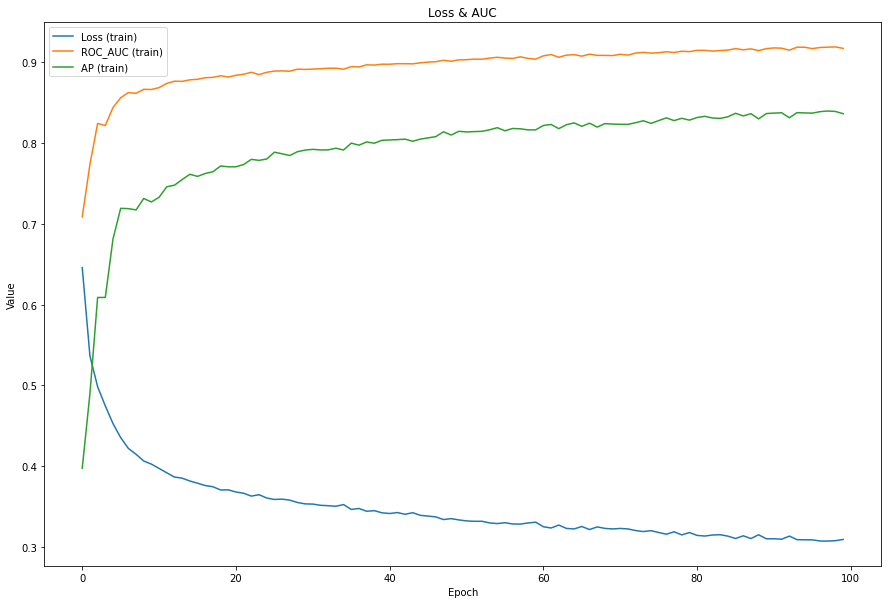

In [50]:
plt.figure(figsize=(15, 10))
plt.plot(history5.history['loss'])
plt.plot(history5.history['auc_10'])
plt.plot(history5.history['auc_11'])
plt.title('Loss & AUC')
plt.legend(['Loss (train)','ROC_AUC (train)','AP (train)'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

In [51]:
merged_X_train = np.hstack((merged_X_train, model5.predict(merged_X_train)))
merged_X_test = np.hstack((merged_X_test, model5.predict(merged_X_test)))

14/14 [==============================] - 0s 3ms/step


### WM

In [52]:
model6 = Sequential()

In [53]:
model6.add(Dense(32, input_dim=18, activation='relu'))
model6.add(Dense(16, activation='relu'))
model6.add(Dense(1, activation='sigmoid'))

In [54]:
model6.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=[AUC(curve='ROC'), AUC(curve='PR')])

In [55]:
history6 = model6.fit(merged_X_train, y_train[:, 6], epochs=100, batch_size=32, verbose=0)

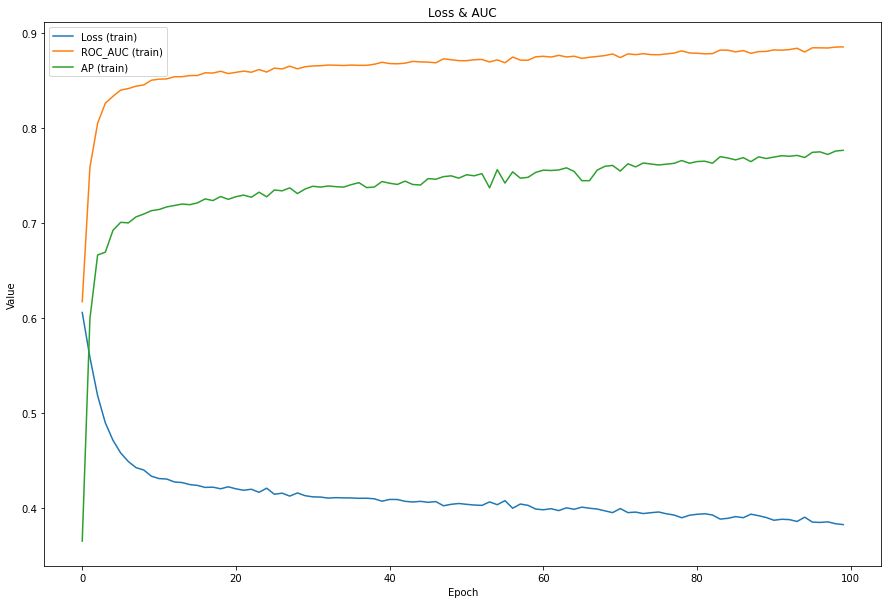

In [56]:
plt.figure(figsize=(15, 10))
plt.plot(history6.history['loss'])
plt.plot(history6.history['auc_12'])
plt.plot(history6.history['auc_13'])
plt.title('Loss & AUC')
plt.legend(['Loss (train)','ROC_AUC (train)','AP (train)'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

In [57]:
merged_X_train = np.hstack((merged_X_train, model6.predict(merged_X_train)))
merged_X_test = np.hstack((merged_X_test, model6.predict(merged_X_test)))

14/14 [==============================] - 0s 2ms/step


### DM

In [58]:
model7 = Sequential()

In [59]:
model7.add(Dense(32, input_dim=19, activation='relu'))
model7.add(Dense(16, activation='relu'))
model7.add(Dense(1, activation='sigmoid'))

In [60]:
model7.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=[AUC(curve='ROC'), AUC(curve='PR')])

In [61]:
history7 = model7.fit(merged_X_train, y_train[:, 7], epochs=100, batch_size=32, verbose=0)

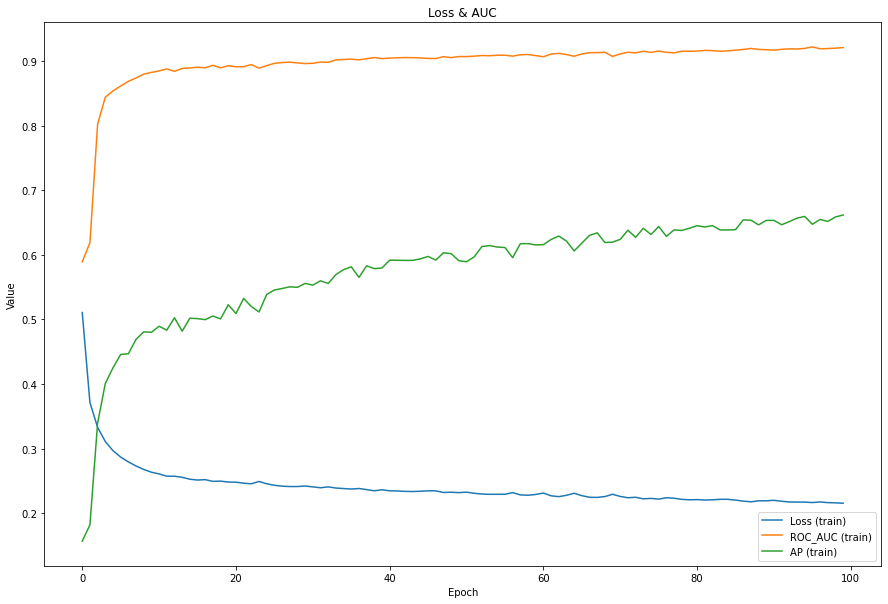

In [62]:
plt.figure(figsize=(15, 10))
plt.plot(history7.history['loss'])
plt.plot(history7.history['auc_14'])
plt.plot(history7.history['auc_15'])
plt.title('Loss & AUC')
plt.legend(['Loss (train)','ROC_AUC (train)','AP (train)'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.show()

In [63]:
merged_y_pred = np.hstack((merged_X_test[:, 12:], model7.predict(merged_X_test)))

14/14 [==============================] - 0s 3ms/step


In [64]:
len(merged_X_test[0])

19

### Evaluation

In [65]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import average_precision_score

In [66]:
hamming_loss(y_test, np.round(merged_y_pred))

0.15005694760820046

In [67]:
mAP = 0
for i in range(len(y_test[0])):
    ap = average_precision_score(y_test[:, i], merged_y_pred[:, i])
    print('class', i, ':', ap)
    mAP += ap
mAP /= 8
print(mAP)

class 0 : 0.9401689027266267
class 1 : 0.8669357844784351
class 2 : 0.6384480779764543
class 3 : 0.4565670290800806
class 4 : 0.5252663755798995
class 5 : 0.7837308444501017
class 6 : 0.647256984026565
class 7 : 0.46807095589085146
0.6658056192761268
